<h2><b>Input : </b></h2>

*   train_microarray.csv

<h2><b>Output : </b></h2>

*   best_feature.pkl

# Run All

## Import dan Load

Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import joblib

Mengatur Style

In [2]:
rcParams['figure.figsize'] = 15, 8
mpl.style.use(['ggplot'])

Load Dataset berupa Data Train

In [3]:
df_train = pd.read_csv('https://drive.google.com/uc?id=1_r9KdY3hz2zVtCD6VZs2nHrnXBGbia8v')

Melihat Dataset

In [4]:
df_train.head()

,211612_s_at,206628_at,222339_x_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,207283_at,219233_s_at,213326_at,...,208938_at,208566_at,207723_s_at,219777_at,222150_s_at,209100_at,205699_at,201547_at,211069_s_at,Label
0,2.433180,2.607790,2.560086,2.672850,2.223647,2.894223,2.730180,2.296307,2.830512,2.516603,...,1.983564,1.823051,1.624148,1.746413,2.416191,2.769184,1.810729,1.983368,3.048148,1.0
1,2.261091,2.407899,2.690311,2.641439,2.350872,3.042087,2.856150,2.348777,2.800074,2.482005,...,2.005752,1.882906,1.610521,1.559600,2.373979,2.834765,1.751637,1.976622,2.972135,0.0
2,2.385914,2.652312,2.558252,2.510368,1.996011,2.624352,2.491994,2.344569,2.781115,2.443602,...,1.687534,1.752161,1.659076,1.772656,2.515434,2.749401,1.864134,2.017966,3.046458,1.0
3,2.262845,2.547491,2.747016,2.747069,2.666440,2.893101,2.998907,2.217520,2.718585,2.482671,...,1.803458,1.882303,1.802360,1.722986,2.048850,2.833805,2.149566,2.319459,2.724557,1.0
4,2.239799,2.501600,2.721664,2.785209,2.600757,3.116527,2.977250,2.328208,2.875340,2.543112,...,1.864520,1.888038,1.832892,1.732615,2.193482,2.834802,1.781193,2.141133,2.986475,0.0


Melihat Ukuran Dataset

In [5]:
df_train.shape

(130, 22216)

## Missing Value

Melakukan pengecekan Missing Value

In [6]:
missing_value = df_train.isna().sum()
count = 0

for i in range(0,len(missing_value)):
  if (missing_value[i] != 0):
    count += 1

print('Missing Value sebanyak', count, 'kolom')

Missing Value sebanyak 0 kolom


## Duplikat Kolom

Melakukan Pengecekan Kolom

In [7]:
len(np.unique(df_train.columns))

22216

## Reduksi Fitur Standard Deviation

Visualisasi Simpangan Baku setiap Kolom/Fitur

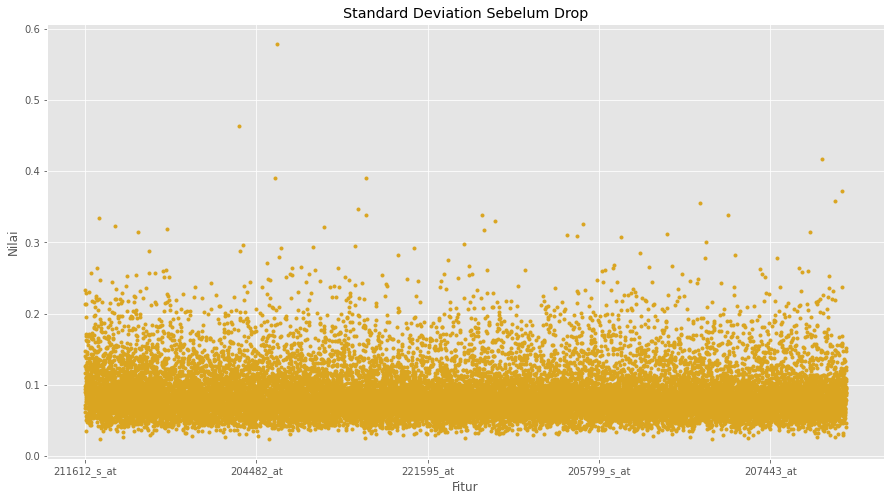

In [8]:
df_train.iloc[:,:-1].std().plot(style='.', color='goldenrod')
plt.title('Standard Deviation Sebelum Drop')
plt.xlabel('Fitur')
plt.ylabel('Nilai')
plt.show()

Memfilter Kolom dengan Simpangan Baku < 0.1 dan menghasilkan list berupa index-index dari kolom yang akan didrop

In [9]:
simpangan_baku = df_train.iloc[:,:-1].std()
drop_kolom_index = []

for i in range(0,len(simpangan_baku)):
  if (simpangan_baku[i] < 0.1):
    drop_kolom_index.append(i)

print(len(drop_kolom_index))

16860


Mengubah index yang akan didrop tersebut menjadi nama kolom

In [10]:
drop_kolom = []

for i in range(0,len(drop_kolom_index)):
  drop_kolom.append(df_train.columns[drop_kolom_index[i]])

print(len(drop_kolom))

16860


Ukuran setelah melakukan Drop

In [11]:
df_train.drop(columns=drop_kolom, inplace=True)
df_train.shape

(130, 5356)

Visualisasi setelah dilakukan drop

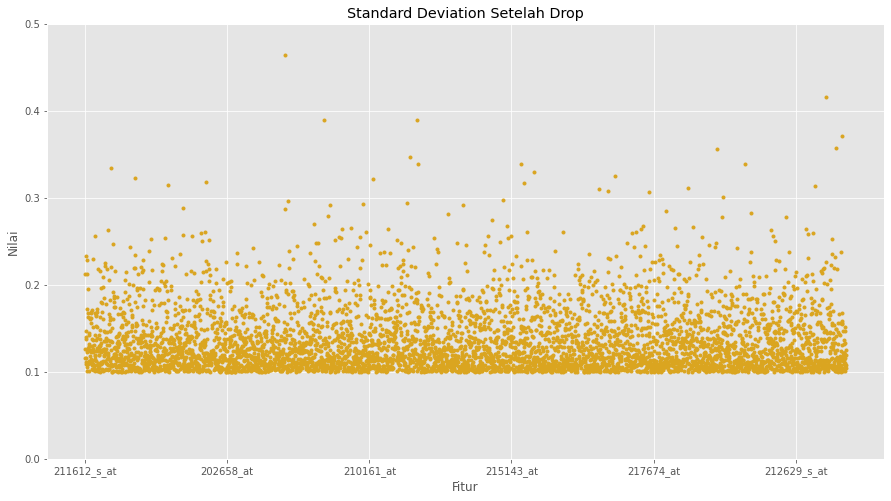

In [12]:
df_train.iloc[:,:-1].std().plot(style='.', color='goldenrod')
plt.title('Standard Deviation Setelah Drop')
plt.xlabel('Fitur')
plt.ylabel('Nilai')
plt.ylim(0,0.5)
plt.show()

## Split X_train dan y_train

Melakukan Split untuk X_train dan y_train

In [13]:
X = df_train.iloc[:,:-1]
X.head()

,211612_s_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,207730_x_at,205401_at,209703_x_at,...,203868_s_at,201488_x_at,220394_at,212055_at,203460_s_at,204971_at,209395_at,208938_at,219777_at,222150_s_at
0,2.433180,2.672850,2.223647,2.894223,2.730180,2.708516,2.677585,3.043026,2.277064,2.636799,...,1.952270,2.864931,1.657045,2.757382,2.818769,3.177515,1.729641,1.983564,1.746413,2.416191
1,2.261091,2.641439,2.350872,3.042087,2.856150,2.800348,2.392170,3.129235,2.249331,2.782383,...,1.821324,2.743461,1.663437,2.808874,2.835889,3.229470,1.805189,2.005752,1.559600,2.373979
2,2.385914,2.510368,1.996011,2.624352,2.491994,2.648607,2.355828,2.921754,2.316953,2.422551,...,2.012130,2.975771,1.735791,2.712590,2.804040,3.336795,1.727185,1.687534,1.772656,2.515434
3,2.262845,2.747069,2.666440,2.893101,2.998907,2.992614,2.352489,3.307086,2.165011,2.685958,...,2.010799,2.549080,2.053929,2.454013,2.154950,2.834433,1.946313,1.803458,1.722986,2.048850
4,2.239799,2.785209,2.600757,3.116527,2.977250,2.859183,2.296027,3.216666,2.221606,2.700011,...,1.950056,2.749509,1.891938,2.705312,2.672296,3.283322,1.741942,1.864520,1.732615,2.193482


In [14]:
y = df_train.iloc[:,-1]
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: Label, dtype: float64

## Seleksi Fitur

### Random Forest dan AdaBoost Feature Importance

Random Forest

In [15]:
model_rf = RandomForestClassifier()
model_rf = model_rf.fit(X,y)

AdaBoost

In [16]:
model_ab = AdaBoostClassifier()
model_ab = model_ab.fit(X,y)

### Pemilahan Fitur yang ada di Keduanya

Drop fitur dengan nilai importance = 0

In [17]:
top_fitur1 = pd.Series(model_rf.feature_importances_, index=X.columns)
top_fitur2 = pd.Series(model_ab.feature_importances_, index=X.columns)
drop_fitur1 = []
drop_fitur2 = []

# Mendapatkan nama fitur dengan nilai importance = 0
for i in range(0, len(top_fitur1)):
  if (top_fitur1[i] == 0):
    drop_fitur1.append(top_fitur1.index[i])
  if (top_fitur2[i] == 0):
    drop_fitur2.append(top_fitur2.index[i])

# Melakukan drop fitur
top_fitur1 = top_fitur1.drop(drop_fitur1)
top_fitur2 = top_fitur2.drop(drop_fitur2)

Banyaknya fitur dengan nilai importances >0 dari masing-masing Random Forest dan AdaBoost

In [18]:
print(len(top_fitur1), len(top_fitur2))

988 46


Mencari Fitur dengan nama sama di Random Forest dan AdaBoost

In [19]:
best_feature = []
rf_importances = []
ab_importances = []

for i in range(0,len(top_fitur1)):
  for j in range(0,len(top_fitur2)):
    if (top_fitur1.index[i] == top_fitur2.index[j]):
      best_feature.append(top_fitur1.index[i])
      rf_importances.append(top_fitur1[i])
      ab_importances.append(top_fitur2[j])

print(len(best_feature), len(rf_importances), len(ab_importances))

24 24 24


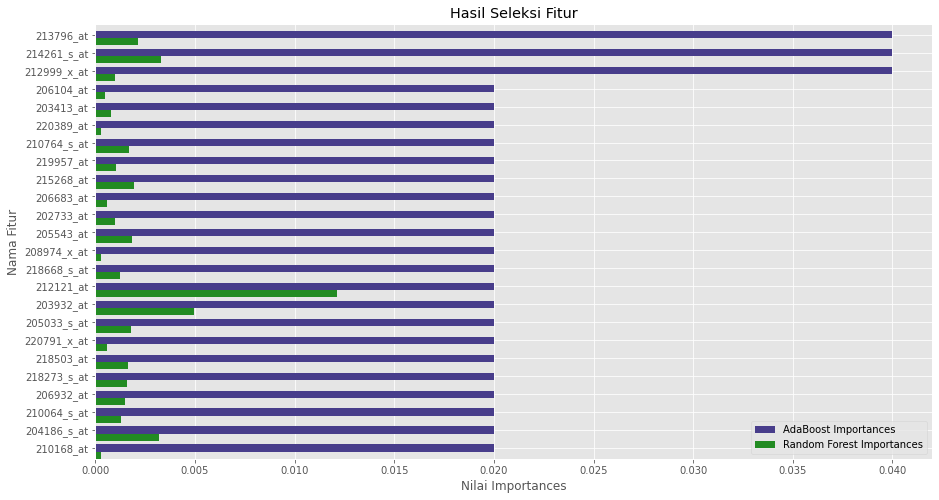

In [20]:
df_vis = pd.DataFrame(dict(graph=best_feature, n=rf_importances, m=ab_importances))
df_vis = df_vis.sort_values(by='m', ascending=True)

ind = np.arange(len(df_vis))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind + width, df_vis.m, width, color='darkslateblue', label='AdaBoost Importances')
ax.barh(ind, df_vis.n, width, color='forestgreen', label='Random Forest Importances')

ax.set(yticks=ind + width, yticklabels=df_vis.graph, ylim=[2*width - 1, len(df_vis)])
ax.set_xlabel('Nilai Importances')
ax.set_ylabel('Nama Fitur')
ax.legend()
plt.title('Hasil Seleksi Fitur')

plt.show()

Seleksi Fitur akhir

In [21]:
best_feature.append('Label')
df_feature = df_train[best_feature]
df_feature.head()

,210168_at,203413_at,214261_s_at,220389_at,210764_s_at,219957_at,215268_at,206683_at,202733_at,205543_at,...,205033_s_at,220791_x_at,218503_at,218273_s_at,206932_at,210064_s_at,204186_s_at,218668_s_at,208974_x_at,Label
0,2.698125,3.107873,2.834662,2.747929,2.817337,2.451694,1.827054,2.040676,2.949281,2.232630,...,2.368650,1.647203,3.025496,2.299563,2.810588,3.133350,2.548400,1.826488,2.972731,1.0
1,2.293900,2.672588,2.611291,3.009061,2.488425,2.398550,1.770540,1.879630,2.828378,2.199190,...,2.405635,1.699744,2.865492,2.174772,2.880740,3.232288,2.554832,1.746584,2.977777,0.0
2,2.399431,2.889090,2.605791,2.725291,2.502083,2.261000,1.637672,2.140230,2.841831,2.183796,...,2.391431,1.655388,2.870142,2.840631,2.677821,3.201589,2.309634,1.790644,3.105394,1.0
3,2.521457,2.645042,2.810516,2.631073,2.548259,2.265628,1.747258,1.896786,2.686695,1.774922,...,2.473243,1.864080,2.799175,2.199311,2.470905,2.653567,2.130495,1.829052,2.540820,1.0
4,2.155440,2.668677,2.699370,2.921175,2.480769,2.531731,1.778198,2.009543,2.823255,2.113964,...,2.294168,1.755021,2.925871,2.149401,2.630203,3.000877,2.437506,1.727929,2.850195,0.0


Melihat Korelasi antar Kolom

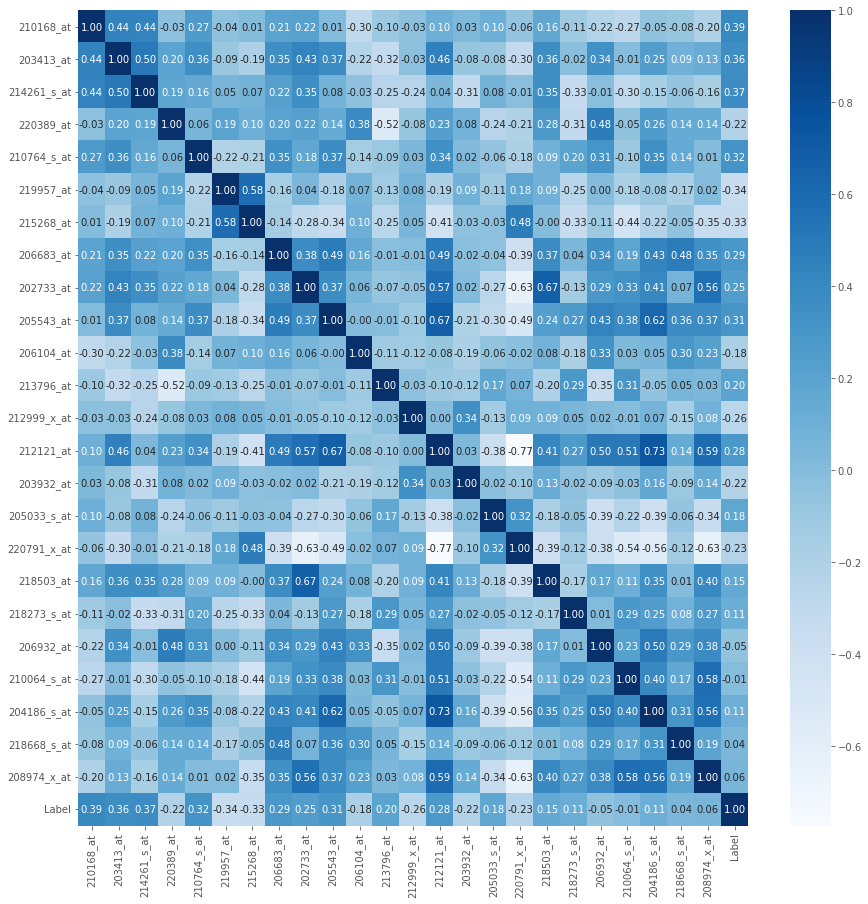

In [22]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_feature.corr(), cmap='Blues', annot=True, fmt='.2f')

## Visualisasi

Pemisahan kanker dan tidak kanker

In [23]:
kanker = df_feature[df_feature['Label'] == 1.0]
tidak = df_feature[df_feature['Label'] == 0.0]

In [29]:
vis = df_feature.sample(3, axis=1)
vis

,218273_s_at,210168_at,206104_at
0,2.299563,2.698125,2.485391
1,2.174772,2.293900,2.712140
2,2.840631,2.399431,2.709787
3,2.199311,2.521457,2.494391
4,2.149401,2.155440,2.606962
...,...,...,...
125,2.033908,2.583429,2.515146
126,2.536325,2.428447,2.568684
127,2.356961,2.507913,2.271485
128,2.176116,2.400787,2.694990


In [30]:
nama_kolom = vis.columns
nama_kolom

Index(['218273_s_at', '210168_at', '206104_at'], dtype='object')

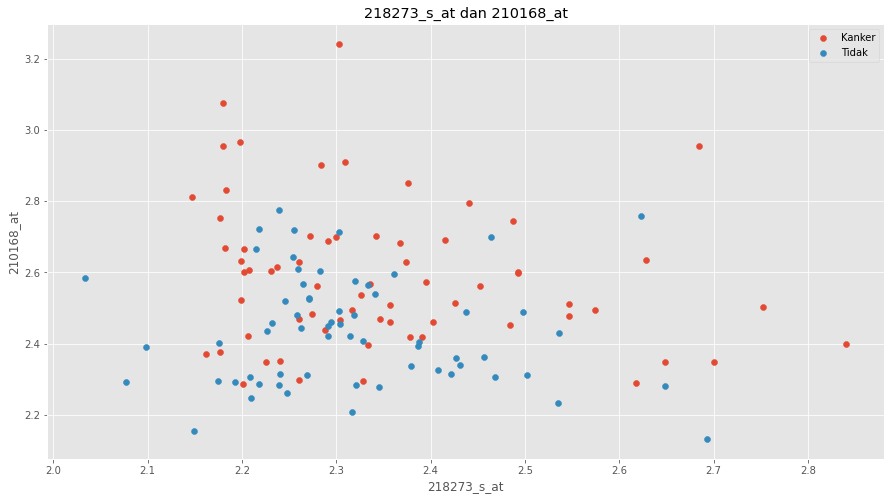

In [31]:
plt.scatter(x=kanker[nama_kolom[0]], y=kanker[nama_kolom[1]])
plt.scatter(x=tidak[nama_kolom[0]], y=tidak[nama_kolom[1]])
plt.title(nama_kolom[0] + ' dan ' + nama_kolom[1])
plt.xlabel(nama_kolom[0])
plt.ylabel(nama_kolom[1])
plt.legend(['Kanker', 'Tidak'])
plt.show()

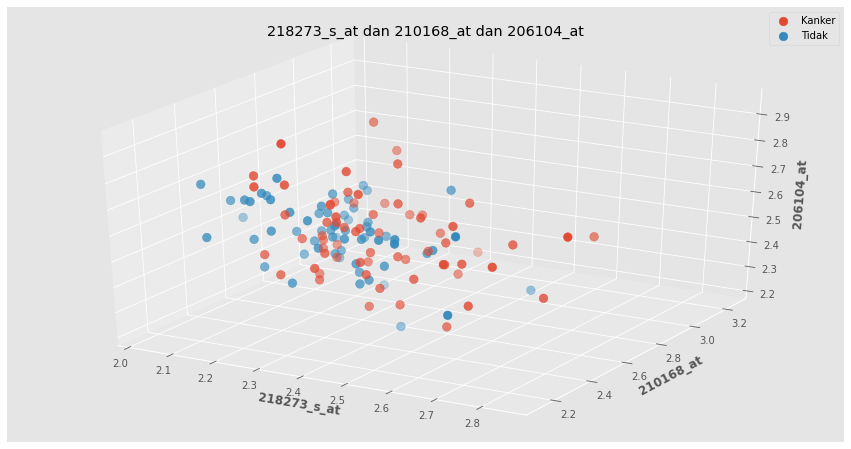

In [32]:
fig = plt.figure()
ax = plt.axes(projection ="3d")

ax.scatter(kanker[nama_kolom[0]], kanker[nama_kolom[1]], kanker[nama_kolom[2]], s=75)
ax.scatter(tidak[nama_kolom[0]], tidak[nama_kolom[1]], tidak[nama_kolom[2]], s=75)

plt.title(nama_kolom[0] + ' dan ' + nama_kolom[1] + ' dan ' + nama_kolom[2])
ax.set_xlabel(nama_kolom[0], fontweight ='bold')
ax.set_ylabel(nama_kolom[1], fontweight ='bold')
ax.set_zlabel(nama_kolom[2], fontweight ='bold')

plt.legend(['Kanker', 'Tidak'])
plt.show()

## Export

Melakukan Export untuk best feature

In [28]:
joblib.dump(best_feature, 'best_feature.pkl')

['best_feature.pkl']